In [2]:
import numpy as np
from numpy import sin, cos, exp, tanh, pi, linspace, dot
from numpy.random import normal
from numpy.linalg import eigvals, inv, norm, svd
import matplotlib.pyplot as plt

# Echo-State Network (ENS) implementation and trials
Implementation of an ESN from Romain Couillet, *Principes de l’apprentissage statistique supervisé*
## Questions
* Qu'apporte la normalisation de $W_{in}$ ?

# 1. MAIN TEST

In [3]:
# Data
T = 1000
n = 1
f = lambda t : cos(16*t)*sin(10*t + pi/2)

shift = 0.05
t =  linspace(0, 1, T)
x = f(t)
y = f(t - shift)

In [4]:
# Parameters
sigma = lambda x: tanh(x)
N = 1000
r  =  1.01
gamma = 1
fo = 200
tr = 400

In [5]:
# Random function
randn = lambda N,n: normal(size=(N,n)) # Random normal
# randn = lambda N,n: rand(N,n)*2 - 1 # Random unif

# Fonctionne NETTEMENT plus mal lorsque on est pas centré en 0
# Unif et normal ont des résultats similaires

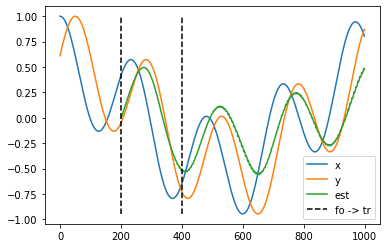

In [65]:
# MATRIX GENERATION
## Generate W_in, matrix of size N * n, weights from data to reservoir neurons 
W_in = randn(N,1)
W_in = W_in/norm(W_in) 

## Generate W_res, matrix of size N * N, weights from reservoir to reservoir 
W_res = randn(N,N)
l = max(abs(eigvals(W_res))) # Spectral radius of W_res
W_res = r*W_res/l # Normalisation to stay stable

# RESERVOIR GENERATION
## Reservoir values along time
Z = np.zeros((N,T))
for i in range(1, T):
    Z[:, i] = sigma(dot(W_res, Z[:, i-1]) + dot(W_in, x[i]).T)

# LEARNING
# get w_out values
Zp = Z[:, fo:tr]
yp = y[fo:tr]
w_out =  dot(Zp, dot(inv(gamma*np.identity(tr-fo) + dot(Zp.T,Zp)),yp))
y_est = dot(w_out.T, Z)

# PLOTTING
plt.plot(range(T), x, range(T), y, range(fo, T), y_est[fo:]);
ymin = min(y)
ymax = max(y)
plt.plot([fo, fo], [ymin, ymax], color='black', linestyle='dashed')
plt.plot([tr, tr], [ymin, ymax], color='black', linestyle='dashed')

plt.legend(["x","y",'est', 'fo -> tr']);

# 2. ROUE LIBRE

In [69]:
# Parameters
sigma = lambda x: tanh(x)
N = 1000
r  =  0.8
gamma = 1
fo = 200
tr = 400

In [70]:
# Random function
randn = lambda N,n: normal(size=(N,n)) # Random normal
# randn = lambda N,n: rand(N,n)*2 - 1 # Random unif

# Fonctionne NETTEMENT plus mal lorsque on est pas centré en 0
# Unif et normal ont des résultats similaires

In [72]:
# MATRIX GENERATION
## Generate W_in, matrix of size N * n, weights from data to reservoir neurons 
W_in = randn(N,1)
W_in = W_in/norm(W_in) 

## Generate W_res, matrix of size N * N, weights from reservoir to reservoir 
W_res = randn(N,N)
l = max(abs(eigvals(W_res))) # Spectral radius of W_res
W_res = r*W_res/l # Normalisation to stay stable

# RESERVOIR GENERATION
## Reservoir values along time
Z = np.zeros((N,T))
for i in range(1, T):
    Z[:, i] = sigma(dot(W_res, Z[:, i-1]) + dot(W_in, x[i]).T)

# LEARNING
# get w_out values
Zp = Z[:, fo:tr]
yp = y[fo:tr]
w_out =  dot(Zp, dot(inv(gamma*np.identity(tr-fo) + dot(Zp.T,Zp)),yp))
y_est = dot(w_out.T, Z)

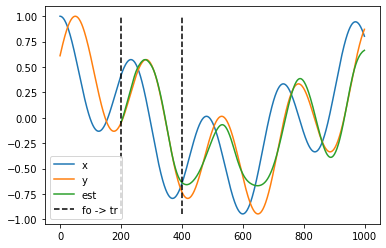

In [18]:
# PLOTTING
plt.plot(range(T), x, range(T), y, range(fo, T), y_est[fo:]);
plt.plot([fo, fo], [min(y), max(y)], color='black', linestyle='dashed')
plt.plot([tr, tr], [min(y), max(y)], color='black', linestyle='dashed')

plt.legend(["x","y",'est', 'fo -> tr']);

# 3. Compare sigma functions

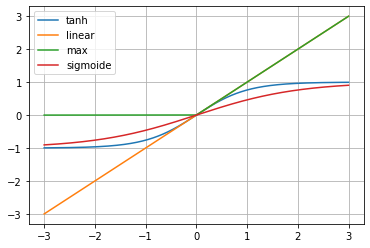

In [23]:
sigma_functions = {
    'tanh': lambda x : tanh(x),
    'linear': lambda x: x,
    'max': lambda x: (x>=0)*x,
#     'sng': lambda x: -1*(x<0) + (x>=0),
    'sigmoide': lambda x: -1 + 2/(1 + exp(-1*x))
}
tt = linspace(-3, 3, 1000)
X = list()
for name, sigmate in sigma_functions.items():
    X.append(sigmate(tt))
X = np.array(X)
plt.plot(tt,X.T);
plt.grid(True)
plt.legend(sigma_functions.keys());

In [84]:
# Parameters
N = 1000
r  =  1.01
gamma = 1.01
fo = 200
tr = 400

In [85]:
# MATRIX GENERATION
## Generate W_in, matrix of size N * n, weights from data to reservoir neurons 
W_in = randn(N,1)
W_in = W_in/norm(W_in) 

## Generate W_res, matrix of size N * N, weights from reservoir to reservoir 
W_res = randn(N,N)
l = max(abs(eigvals(W_res))) # Spectral radius of W_res
W_res = r*W_res/l # Normalisation to stay stable

# LOOP OVER SIGMAS
Y_EST = list()
for name, sigma in sigma_functions.items():
    ## Reservoir values along time
    Z = np.zeros((N,T))
    for i in range(1, T):
        Z[:, i] = sigma(dot(W_res, Z[:, i-1]) + dot(W_in, x[i]).T)
    
    # LEARNING
    # get w_out values
    Zp = Z[:, fo:tr]
    yp = y[fo:tr]
    w_out =  dot(Zp, dot(inv(gamma*np.identity(tr-fo) + dot(Zp.T,Zp)),yp))
    y_est = dot(w_out.T, Z)
    
    Y_EST.append(y_est[fo:])
    

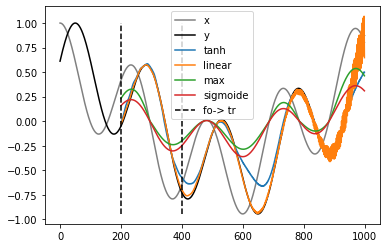

In [88]:
Y_EST = np.array(Y_EST)
plt.plot(range(T), x,  color = 'gray');
plt.plot(range(T), y,  color = 'black');
plt.plot(range(fo, T), Y_EST.T);
plt.plot([fo, fo], [min(y), max(y)], color='black', linestyle='dashed')
plt.plot([tr, tr], [min(y), max(y)], color='black', linestyle='dashed')
plt.legend(['x','y'] + list(sigma_functions.keys())+['fo-> tr']);

## Remarques: 
* le sigmoide qui ressemble énormément à tanh, est pourtant loin du même résultat, même avec des valeurs se raprochant de 2 (égal à tanh) 
* Euuh quelles propriétés expliquent ces mécanismes ?
    * Linear: valeurs du réservoir explosent car rayon légèrement au dessus de 1. Perfection lors d'un rayon à 1
    * Les sigmoides et max semblent avoir une mémoire trop courte

# 4. Faire varier $\rho$

In [76]:
rho_values = [0.8, 
              0.9, 
              1, 
              1.01, 
              1.05, 
              1.2
             ]

In [77]:
# Parameters
N = 1000
r  =  1.01
sigma = sigma_functions['tanh']
gamma = 1
fo = 200
tr = 400

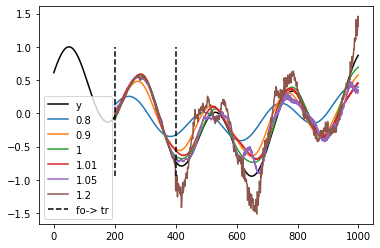

In [78]:
# LOOP OVER rhos
Y_EST = list()
for r in rho_values:
    
    # MATRIX GENERATION
    ## Generate W_in, matrix of size N * n, weights from data to reservoir neurons 
    W_in = randn(N,1)
    W_in = W_in/norm(W_in) 

    ## Generate W_res, matrix of size N * N, weights from reservoir to reservoir 
    W_res = randn(N,N)
    l = max(abs(eigvals(W_res))) # Spectral radius of W_res
    W_res = r*W_res/l # Normalisation to stay stable

    ## Reservoir values along time
    Z = np.zeros((N,T))
    for i in range(1, T):
        Z[:, i] = sigma(dot(W_res, Z[:, i-1]) + dot(W_in, x[i]).T)
    
    # LEARNING
    # get w_out values
    Zp = Z[:, fo:tr]
    yp = y[fo:tr]
    w_out =  dot(Zp, dot(inv(gamma*np.identity(tr-fo) + dot(Zp.T,Zp)),yp))
    y_est = dot(w_out.T, Z)
    
    Y_EST.append(y_est[fo:])

Y_EST = np.array(Y_EST)
plt.plot(range(T), y,  color = 'black');
plt.plot(range(fo, T), Y_EST.T);
plt.plot([fo, fo], [min(y), max(y)], color='black', linestyle='dashed')
plt.plot([tr, tr], [min(y), max(y)], color='black', linestyle='dashed')
plt.legend(['y'] + rho_values + ['fo-> tr']);

## Remarques
* Valeurs autour de 1, 1.01 semblent optimales
* En dessous: sous estime car mémoire trop courte et donc se rapproche d'une fonction de x
* Au dessus: trop grande variance car les valeurs du réservoir explosent

# 5. Differentes W_res
## 5.1 Avec des matrices unitaires rescale 

In [85]:
rho_values = [1,
              1.01, 
              1.2, 
              1.3,
              1.39
             ]

In [86]:
# Parameters
N = 1000
sigma = tanh
gamma = 1
fo = 200
tr = 400

In [87]:
# LOOP OVER rhos
from scipy.stats import unitary_group
Y_EST = list()
for r in rho_values:
    
    # MATRIX GENERATION
    ## Generate W_in, matrix of size N * n, weights from data to reservoir neurons 
    W_in = randn(N,1)
    W_in = W_in/norm(W_in) 

    ## Generate W_res, matrix of size N * N, weights from reservoir to reservoir 
    W_res = unitary_group.rvs(dim=N)
    W_res = W_res*r

    ## Reservoir values along time
    Z = np.zeros((N,T))
    for i in range(1, T):
        Z[:, i] = sigma(dot(W_res, Z[:, i-1]) + dot(W_in, x[i]).T)
    
    # LEARNING
    # get w_out values
    Zp = Z[:, fo:tr]
    yp = y[fo:tr]
    w_out =  dot(Zp, dot(inv(gamma*np.identity(tr-fo) + dot(Zp.T,Zp)),yp))
    y_est = dot(w_out.T, Z)
    
    Y_EST.append(y_est[fo:])

Y_EST = np.array(Y_EST)

<ipython-input-87-42da31ac1a6e>:18: ComplexWarning: Casting complex values to real discards the imaginary part
  Z[:, i] = sigma(dot(W_res, Z[:, i-1]) + dot(W_in, x[i]).T)


Text(0.5, 1.0, 'Unitary matrix')

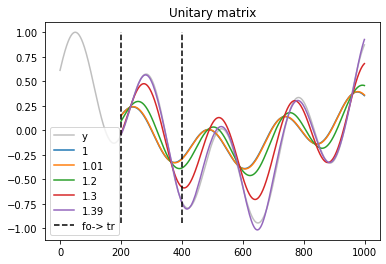

In [88]:
plt.plot(range(T), y,  color = 'gray', alpha=0.5);
plt.plot(range(fo, T), Y_EST.T);
plt.plot([fo, fo], [min(y), max(y)], color='black', linestyle='dashed')
plt.plot([tr, tr], [min(y), max(y)], color='black', linestyle='dashed')
plt.legend(['y'] + rho_values + ['fo-> tr']);
plt.title('Unitary matrix')

## Remarques
* Les matrices unitaires ont besoin d'être rescale avec un rayon spectral plus grand (meilleur = 1.39). Je ne sais pas pourquoi. Les matrices unitaires ont des valeurs propres toutes égales à 1. 

## 5.2 Avec une diagonale de blocks avec différentes valeurs propres

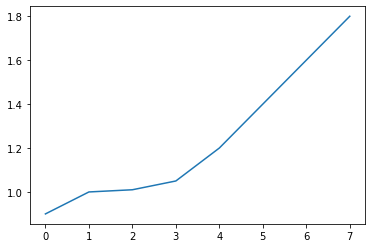

In [97]:
rayons = [ 0.9, 1, 1.01, 1.05, 1.2, 1.4, 1.6, 1.8]
plt.plot(rayons);

In [114]:
# Data
T = 10000
n = 1
f = lambda t : cos(16*t)*sin(10*t + pi/2)

shift = 0.05
t =  linspace(0, 5, T)
x = f(t)
y = f(t - shift)

In [120]:
# Parameters
N = 1000
sigma = tanh
gamma = 1
fo = 2000
tr = 4000

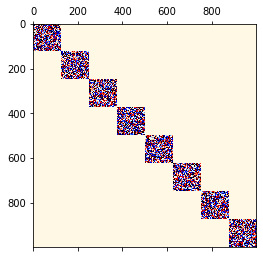

In [121]:
## Generate W_res, matrix of size N * N, weights from reservoir to reservoir 
W_res = np.zeros((N,N))
indices = [int(i*(N/len(rayons))) for i in range(len(rayons))] + [N]
for i,r in enumerate(rayons):
    fi,ti = indices[i:i+2] # Index from to
    
    W_r = randn(ti-fi,ti-fi)
    l = max(abs(eigvals(W_r))) # Spectral radius of W_r
    W_r = r*W_r/l # Normalisation to stay stable
    
    W_res[fi:ti,fi:ti] = W_r

plt.matshow(W_res, cmap = 'flag');

In [122]:
# MATRIX GENERATION
## Generate W_in, matrix of size N * n, weights from data to reservoir neurons 
W_in = randn(N,1)
W_in = W_in/norm(W_in) 

# RESERVOIR GENERATION
## Reservoir values along time
Z = np.zeros((N,T))
for i in range(1, T):
    Z[:, i] = sigma(dot(W_res, Z[:, i-1]) + dot(W_in, x[i]).T)

# LEARNING
# get w_out values
Zp = Z[:, fo:tr]
yp = y[fo:tr]
w_out =  dot(Zp, dot(inv(gamma*np.identity(tr-fo) + dot(Zp.T,Zp)),yp))
y_est = dot(w_out.T, Z)

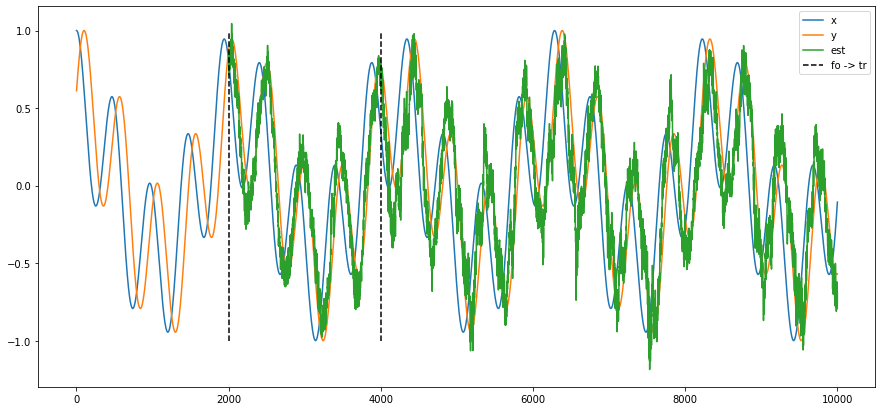

In [123]:
# PLOTTING
plt.figure(figsize = (15,7))
plt.plot(range(T), x, range(T), y, range(fo, T), y_est[fo:]);
plt.plot([fo, fo], [min(y), max(y)], color='black', linestyle='dashed')
plt.plot([tr, tr], [min(y), max(y)], color='black', linestyle='dashed')

plt.legend(["x","y",'est', 'fo -> tr']);

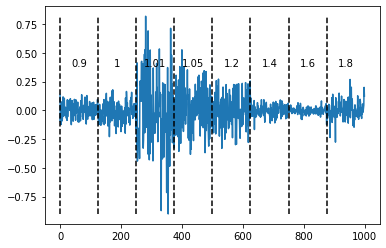

In [124]:
plt.plot(w_out)
for k, (i, j, r) in enumerate(zip(indices[:-1], indices[1:], rayons)):
#     plt.plot([i,j],[0,0], linewidth = 1)
    plt.plot([i,i], [min(w_out), max(w_out)], color = 'black', linestyle = 'dashed')
    plt.text((i+j)/2, max(w_out)/2, r, ha='center', va='center')

### Remarques
* J'ai été contraint d'augmenter la période d'apprentissage, autrement les neurones des derniers blocks étaient trop sollicités, sans que je comprenne vraiment pourquoi 
* On voit alors que les neurones les plus sollicités sont ceux qui font partie des blocks avec un rayonspectral  de 1.01 à 1.2, mais aussi une étrange résurgence à 1.8

# 2. Réseaux multivariés

In [160]:
def lsn(s,n):
    """Function for legends"""
    return ['{}{}'.format(s,i+1) for i in range(n)]

In [168]:
x.shape[1]

2

In [203]:
# Data
T = 1000

f = lambda t : cos(16*t)*sin(10*t + pi/2)

shift = 0.05
t =  linspace(0, 1, T)
x = np.array([f(t), f(2*t)]).T
# y = np.array([f(t - shift), f(2*t-shift)]).T
y = np.array([f(t - shift)+ f(2*t-shift),  f(t - shift) -0.5*f(2*t-shift)]).T

nx = 1 if len(x.shape) == 1 else len(x.T)
ny = 1 if len(y.shape) == 1 else len(y.T)

In [204]:
# Parameters
sigma = lambda x: tanh(x)
N = 1000
r  =  1.01
gamma = 1
fo = 200
tr = 400

In [205]:
# MATRIX GENERATION
## Generate W_in, matrix of size N * n, weights from data to reservoir neurons 
W_in = randn(N,nx)
W_in = W_in/norm(W_in) 

## Generate W_res, matrix of size N * N, weights from reservoir to reservoir 
W_res = randn(N,N)
l = max(abs(eigvals(W_res))) # Spectral radius of W_res
W_res = r*W_res/l # Normalisation to stay stable

# RESERVOIR GENERATION
## Reservoir values along time
Z = np.zeros((N,T))
for i in range(1, T):
    Z[:, i] = sigma(dot(W_res, Z[:, i-1]) + dot(W_in, x[i]).T)

# LEARNING
# get w_out values
Zp = Z[:, fo:tr]
yp = y[fo:tr]
w_out =  dot(Zp, dot(inv(gamma*np.identity(tr-fo) + dot(Zp.T,Zp)),yp))
y_est = dot(w_out.T, Z)
y_est = y_est[fo:] if len(y_est.shape) == 1 else y_est[:,fo:]

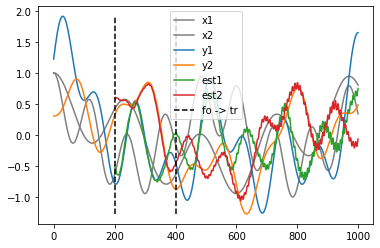

In [206]:
# PLOTTING
plt.plot(range(T), x, color = 'gray')
plt.plot(range(T), y)
plt.plot(range(fo, T), y_est.T);
ymin = y.min()
ymax = y.max()
plt.plot([fo, fo], [ymin, ymax], color='black', linestyle='dashed')
plt.plot([tr, tr], [ymin, ymax], color='black', linestyle='dashed')

plt.legend(lsn("x",nx)+ lsn("y",ny)+ lsn('est',ny)+['fo -> tr']);

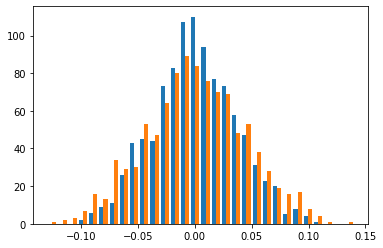

In [209]:
plt.hist(w_out, bins = 30);